Number of iterations needed in gradient descent approach to converge is 749
Number of iterations needed in momentum approach to converge is  74
Number of iterations needed in Nesterov approach to converge is 75


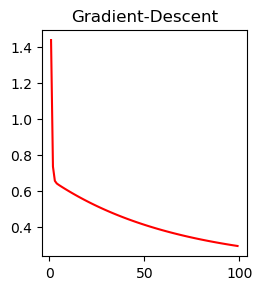

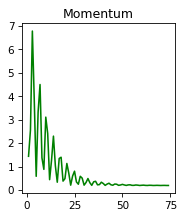

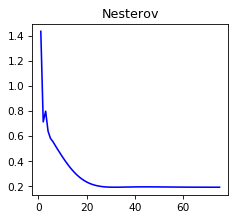

In [7]:
"""
Created on Wed Feb 5 17:53:07 2020
Question 2
@author: Dhirane Satvik Kona, Ramyatha Posani, Achyuth Maddala Sitaram, Mohit Bhagwat

Objective: Overfitting
"""
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval
%matplotlib inline
a = 1.8 #Original values obtained from closed form solution
b = 1.4 #Original values obtained from closed form solution
#GradientA = 2*a + b*4.6200688 - 4.4407613
#GradientB = 4.62006*a + b*11.7068693 - 11.661652
atrue = -0.91
btrue = 1.35
learning_rate = 0.05
gamma = 0.09
data = np.loadtxt('data_HW1_ex1.csv', delimiter=',')
x = data[:,0].reshape(100,1)
y = data[:,1].reshape(100,1)

def hypo(a, b):
    return polyval(x, [a, b])
    
def totalLoss( a, b):
    return np.mean((y - hypo(a, b))**2)

#Through analytic method by finding the partial derivates of loss function wrt a and b respectively
#and the resultant equations are below by keeping track or store of Sigma(x_i), Sigma(y_i), Sigma(x_i*y_i), Sigma(x_i^2)
#Solving for 1/N([y -(a + b*x)]^2) for all x_i,y_i
def lossA(a,b):
    valueLossA = 2*a + b*4.6200688 - 4.4407613
    valueLossB = 4.62006*a + b*11.7068693 - 11.661652
    return np.array([valueLossA,valueLossB]).reshape(-1,1)

#Gradient Descent method using the learning_rate
def descentGradient(a,b,learning_rate):
    epsilon = 0.0038
    atrue = -0.91
    btrue = 1.35
    count=0
    loss = []
    l_r = learning_rate
    I = np.array([a,b]).reshape(-1,1)
    while(True):
        C = np.zeros((2)).reshape(-1,1)
        C = I - l_r*lossA(a,b)
        a = C[0]
        b = C[1]
        I = C
        loss.append(totalLoss(a,b))
        diffa = abs(a - atrue)
        diffb = abs(b-btrue)
        count = count+1
        if diffa <= epsilon and diffb <= epsilon:
            break
        else:
            continue
    print("Number of iterations needed in gradient descent approach to converge is" ,count)
    return count ,loss[:99]
    

#Momentum method to find the convergence
def momentum(a,b,Gamma,learning_rate):
    init_vel = np.zeros((2)).reshape(-1,1)
    epsilon = 0.01
    count=0
    atrue = -0.91
    btrue = 1.35
    loss =[]
    l_r = learning_rate
    I = np.array([a,b]).reshape(-1,1)
    while(True):
        C = np.zeros((2)).reshape(-1,1)
        vel_updated = Gamma*init_vel + l_r*lossA(a,b)
        C = I - vel_updated
        init_vel = vel_updated
        a = C[0]
        b = C[1]
        I = C
        #print(a,b)
        loss.append(totalLoss(a,b))
        diffa = abs(a - atrue)
        diffb = abs(b-btrue)
        count = count+1
        if diffa <= epsilon and diffb <= epsilon:
            break
        else:
            continue
    print("Number of iterations needed in momentum approach to converge is ",count)
    return count,loss

#Nesterov method to find the loss
def nesterov(a,b,Gamma,learning_rate):
    l_r = learning_rate
    init_vel = np.zeros((2)).reshape(-1,1)
    epsilon = 0.01
    count=0
    atrue = -0.91
    btrue = 1.35
    loss =[]
    I = np.array([a,b]).reshape(-1,1)
    while(True):
        C = np.zeros((2)).reshape(-1,1)
        vel_updated = Gamma*init_vel + l_r*lossA(a-Gamma*init_vel[0], b-Gamma*init_vel[1])
        C = I - vel_updated
        init_vel = vel_updated
        a = C[0]
        b = C[1]
        I = C
        loss.append(totalLoss(a,b))
        diffa = abs(a - atrue)
        diffb = abs(b-btrue)
        count = count+1
        if diffa <= epsilon and diffb <= epsilon:
            break
        else:
            continue
    print("Number of iterations needed in Nesterov approach to converge is" ,count)
    return count,loss


a = 1.8
b = 1.4
atrue = -0.91
btrue = 1.35
learning_rate = 0.05
gamma = 0.9

iterationsGradient,lossg = descentGradient(a,b,learning_rate)
countMomentum ,lossm    = momentum(a,b,gamma,learning_rate)
nesterovCount , lossn =      nesterov(a,b,gamma,learning_rate)
graph1 = np.arange(1, 100, 1)
fig = plt.figure(figsize=(9, 3), dpi=100)
ax = fig.add_subplot(1, 3, 1)
ax.plot(graph1, lossg, color='red')
ax.set_title('Gradient-Descent')
graph2 = np.arange(1, 75, 1)
fig = plt.figure(figsize=(9, 3), dpi=75)
ax = fig.add_subplot(1, 3, 2)
ax.plot(graph2, lossm, color='green')
ax.set_title('Momentum')
graph3 = np.arange(1, 76, 1)
fig = plt.figure(figsize=(9, 3), dpi=76)
ax = fig.add_subplot(1, 3, 3)
ax.plot(graph3, lossn, color='blue')
ax.set_title('Nesterov')
plt.tight_layout()
plt.show()

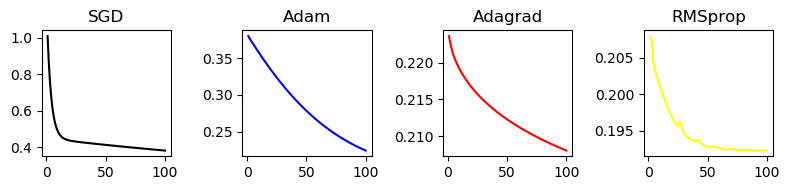

In [8]:
#Extra Credit Question

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval
import torch

class Regression(torch.nn.Module): 
    def __init__(self): 
        super(Regression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1) 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred

#Extra methods of linear regression, Adam, Adagrad, RMSprop, SGD
class extraMethods():
    def __init__(self, data):
        self.x = data[:,0].reshape(100,1)
        self.y = data[:,1].reshape(100,1)
        our_model = Regression()        
        condi = torch.nn.MSELoss(reduction = 'mean')
        methods = []
        methods.append(torch.optim.SGD(our_model.parameters(), lr = 0.01))
        methods.append(torch.optim.Adam(our_model.parameters(), lr = 0.01))
        methods.append(torch.optim.Adagrad(our_model.parameters(), lr = 0.01)) 
        methods.append(torch.optim.RMSprop(our_model.parameters(), lr = 0.01, alpha=0.9))
        epoch_loss = []
        for i in range(4):
            epoch_loss.append([])
        for i, meth in enumerate(methods):
            for epoch in range(100):
                y_pred = our_model(torch.autograd.Variable(torch.Tensor(self.x)))
                loss = condi(y_pred, torch.autograd.Variable(torch.Tensor(self.y)))
                epoch_loss[i].append(loss.item())
                meth.zero_grad()
                loss.backward()
                meth.step()
        graph1 = np.arange(1, 101, 1)
        fig = plt.figure(figsize=(8, 2), dpi=100)
        ax = fig.add_subplot(1, 4, 1)
        ax.plot(graph1, epoch_loss[0], color='black')
        ax.set_title('SGD')
        ax = fig.add_subplot(1, 4, 2)
        ax.plot(graph1, epoch_loss[1], color='blue')
        ax.set_title('Adam')
        ax = fig.add_subplot(1, 4, 3)
        ax.plot(graph1, epoch_loss[2], color='red')
        ax.set_title('Adagrad')
        ax = fig.add_subplot(1, 4, 4)
        ax.plot(graph1, epoch_loss[3], color='yellow')
        ax.set_title('RMSprop')
        plt.tight_layout()
        plt.show()
if __name__=='__main__':
    np.random.seed(2)
    data = np.loadtxt('data_HW1_ex1.csv', delimiter=',')
    variants = extraMethods(data)